# COGS 108 - EDA Checkpoint

# Names

- Joonsung Park
- James Chung
- Richard Gross
- Madison Hambly
- Colin Lintereur

<a id='research_question'></a>
# Research Question

How do the most popular topics from previous COGS 108 final projects vary per quarter from 2019 to 2021? Also what other trends can we find in past submissions, like changes in word count, and number of graphs used?

# Setup

In [1]:
import pandas as pd
import glob as glob
import seaborn as sns
sns.set(font_scale=1, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.cbook import boxplot_stats

plt.rcParams['figure.figsize'] = (20, 10)

# using glob to get all csvs
files = glob.glob('./csvs/*.csv')
df = pd.DataFrame()
entries = 0

# read all csvs to dataframes and combine into one df
for f_name in files:
    csv = pd.read_csv(f_name)
    df = df.append(csv)
    entries = entries + len(csv.index)

assert(len(df.index) == entries)
print('Observations: ' + str(len(df.index)))
df.head()

Observations: 364


,Group,Quarter,Year,Topic,Special,Word_Count,Graph_Count,Table_Count
0,1,FA,20,music and audio,False,6999,15,2
1,2,FA,20,automotive,False,8686,18,16
2,4,FA,20,video gaming,False,1864,13,5
3,5,FA,20,sports,False,5483,32,18
4,6,FA,20,pets,False,4595,19,7


# Data Cleaning

Since we are collecting the data ourselves, there is not much work to be done cleaning the data after collecting all of the csv files for each quarter and merging them together into one large dataset. One operation we will perform, however, is generating a "Quarter_Index" so that we can analyze our data in chronological order based on the quarter. We generate a dictionary called `qtr_index_dict` which will generate an index for each quarter from Spring 19 to Spring 21. NOTE, we do not have any data for Fall 2019 so this quarter is skipped when indexing.

In [2]:
# using glob to get all csvs
files = glob.glob('./csvs/*.csv')
df = pd.DataFrame()
entries = 0

# read all csvs to dataframes and combine into one df
for f_name in files:
    csv = pd.read_csv(f_name)
    df = df.append(csv)
    entries = entries + len(csv.index)

assert(len(df.index) == entries)
print('Observations: ' + str(len(df.index)))

#Add chronological order to rows
chronological = []
#starting from spring 19 as 0
#NOTE: We do not have any data for Fall 2019
qtr_index_dict = {"SP19": 0, "WI20": 1, "SP20": 2, "FA20": 3, "WI21": 4, "SP21": 5}
qtr_index = []

for index, row in df.iterrows():
#     print(row['Quarter'], row['Year'])
    qtr = row['Quarter'] + str(row['Year'])
    qtr_index.append(qtr_index_dict[qtr])
df['Quarter_Index'] = qtr_index

df.head()

Observations: 364


,Group,Quarter,Year,Topic,Special,Word_Count,Graph_Count,Table_Count,Quarter_Index
0,1,FA,20,music and audio,False,6999,15,2,3
1,2,FA,20,automotive,False,8686,18,16,3
2,4,FA,20,video gaming,False,1864,13,5,3
3,5,FA,20,sports,False,5483,32,18,3
4,6,FA,20,pets,False,4595,19,7,3


# Data Analysis & Results (EDA)

Firstly, we can see that our first quarter, Spring 2019, has a much larger number of projects in our datasets than the other quarters. This will impact some of our analysis in the future and we will need to take this into account.

<AxesSubplot:xlabel='Quarter_Index', ylabel='count'>

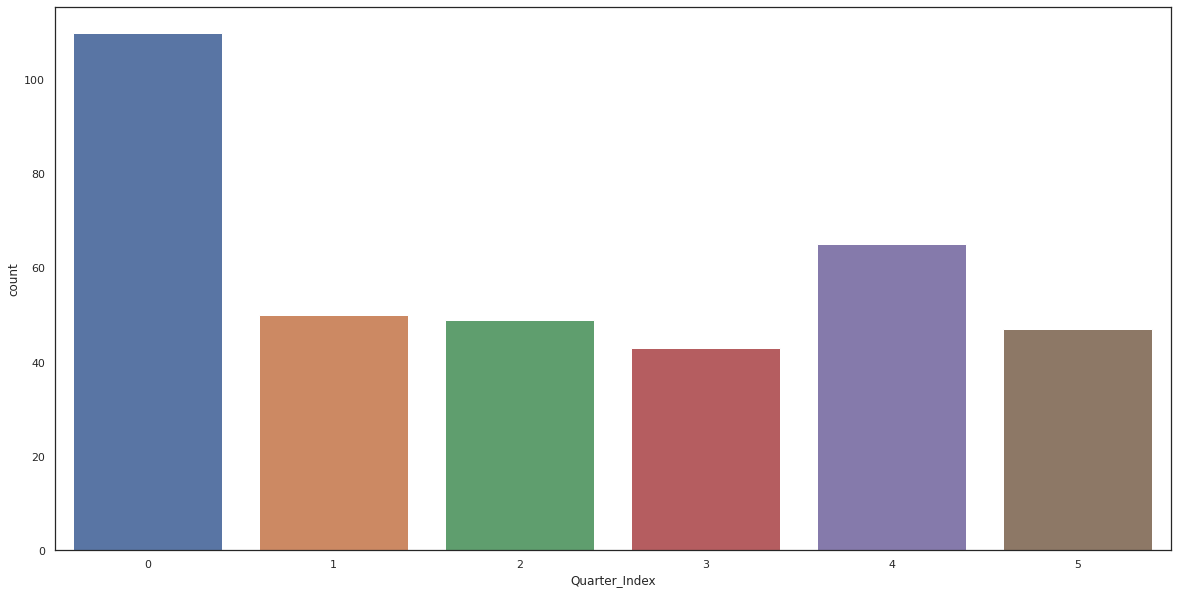

In [3]:
sns.countplot(x='Quarter_Index',data=df)

Next, we counted the total amount of each topic we classified. We can see that medical health is very popular as research topics which is not too surprising given these quarters were all impacted by COVID. One thing that is surprising is how non-uniform this data seems as certain topics dominate in popularity while others, that seem like good topic ideas, have so few papers based on them.

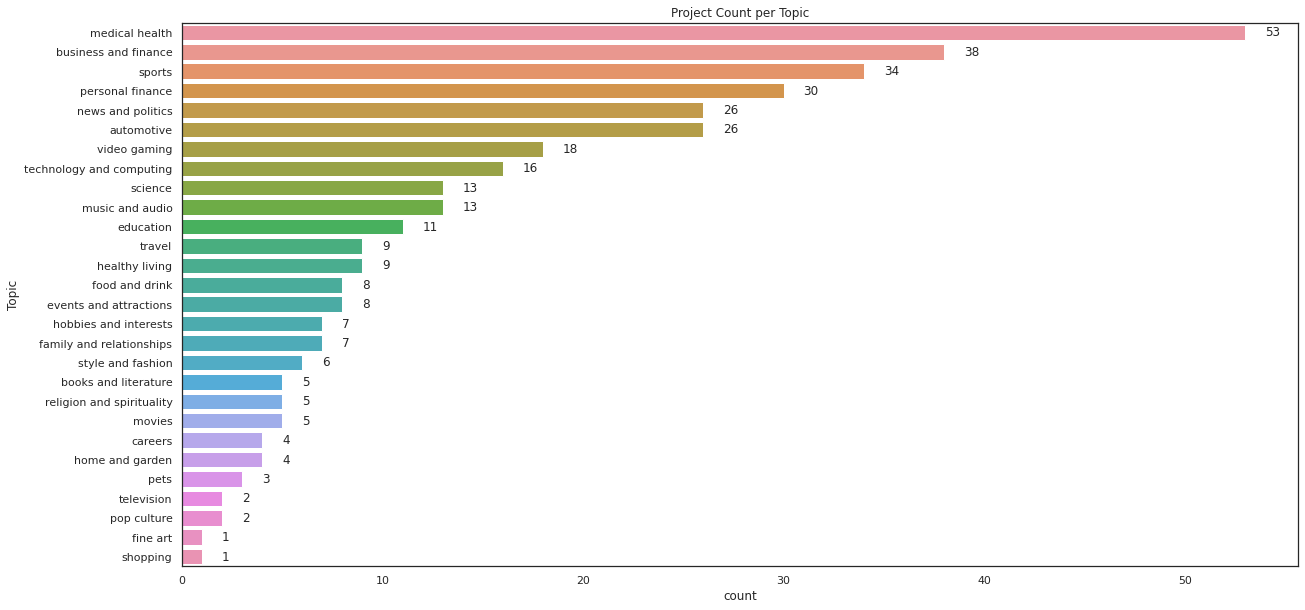

In [4]:
#Total amount of each topic
topic_count = sns.countplot(y='Topic',data=df, order=df['Topic'].value_counts().index)
topic_count.set(title='Project Count per Topic') # title barplot
# label each bar in barplot
for p in topic_count.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    #adding text to each bar
    topic_count.text(x = width+1, # x-coordinate position of data label, padded 1 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center"

Next, we measured the word count, graph count, and table count per quarter. Interestingly, it seems that there is slight upward trend in all of the counts, in terms of their means, throughout the quarters.

<AxesSubplot:xlabel='Quarter_Index', ylabel='Word_Count'>

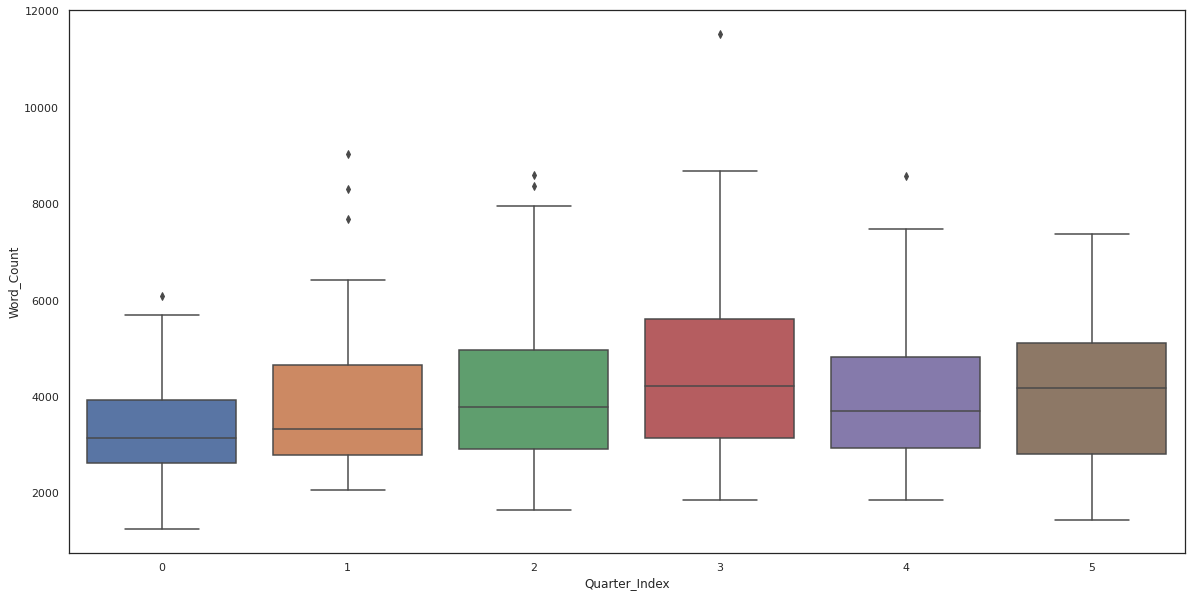

In [5]:
sns.boxplot(x='Quarter_Index', y='Word_Count', data=df)

<AxesSubplot:xlabel='Quarter_Index', ylabel='Graph_Count'>

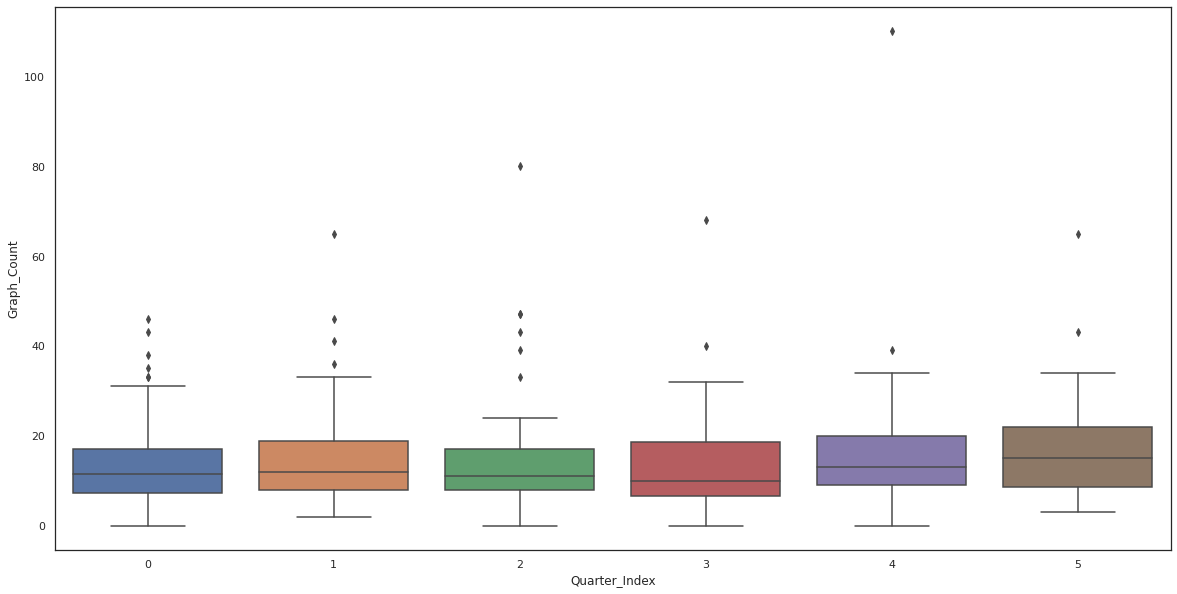

In [6]:
sns.boxplot(x='Quarter_Index', y='Graph_Count', data=df)

<AxesSubplot:xlabel='Quarter_Index', ylabel='Table_Count'>

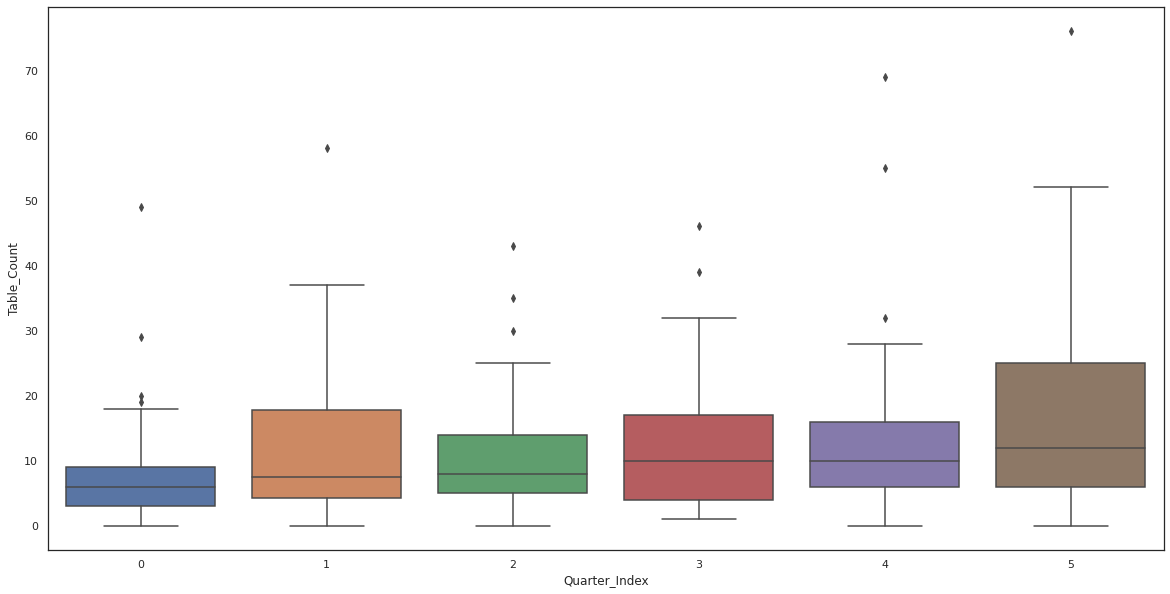

In [7]:
sns.boxplot(x='Quarter_Index', y='Table_Count', data=df)

Next, we measured the word count, graph count, and table count per topic. In terms of word count, it seems that the popularity of a topic does not have much an impact. We can see that more popular topics, which are higher up on the boxplots, have longer whiskers but this is most likely caused by higher variability in topics that are more popular since there are more papers for those topics. In term of graph count, there is not much impact based on the popularity of the topic. However with table count, we can see that less popular topics tend to have higher amounts of tables.

<AxesSubplot:xlabel='Word_Count', ylabel='Topic'>

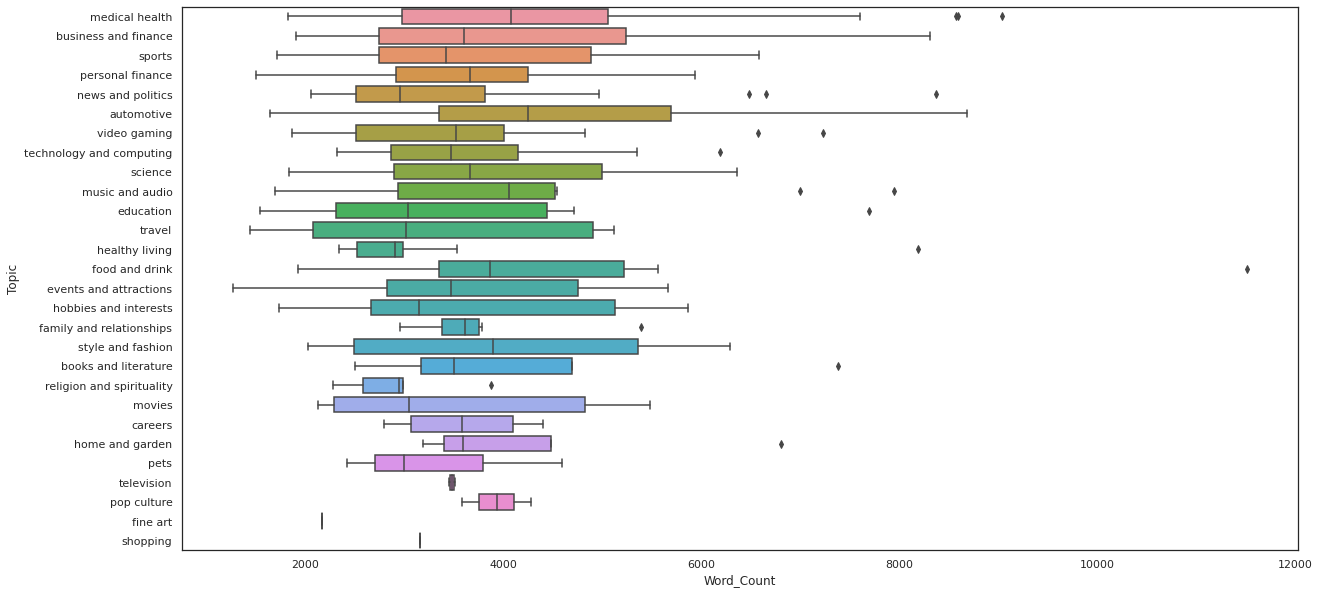

In [8]:
#wordcount boxplot per topic, ordered by topic popularity
sns.boxplot(y='Topic', x='Word_Count', data=df, order=df['Topic'].value_counts().index)

<AxesSubplot:xlabel='Graph_Count', ylabel='Topic'>

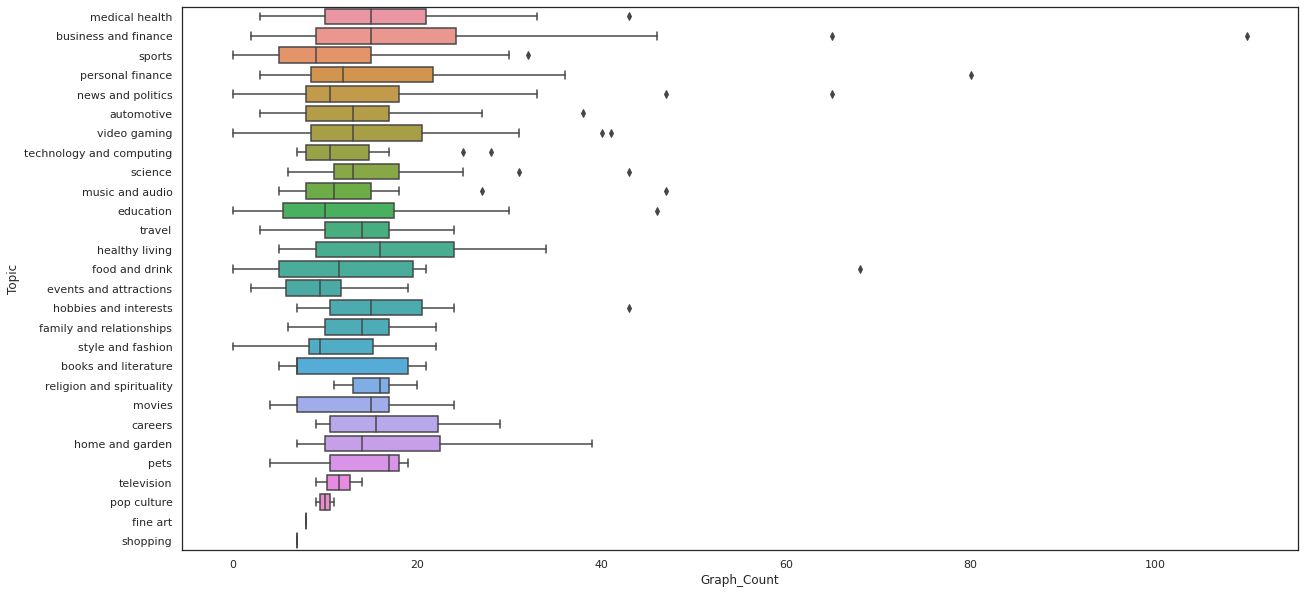

In [9]:
#graphcount boxplot per topic, ordered by topic popularity
sns.boxplot(y='Topic', x='Graph_Count', data=df, order=df['Topic'].value_counts().index)

<AxesSubplot:xlabel='Table_Count', ylabel='Topic'>

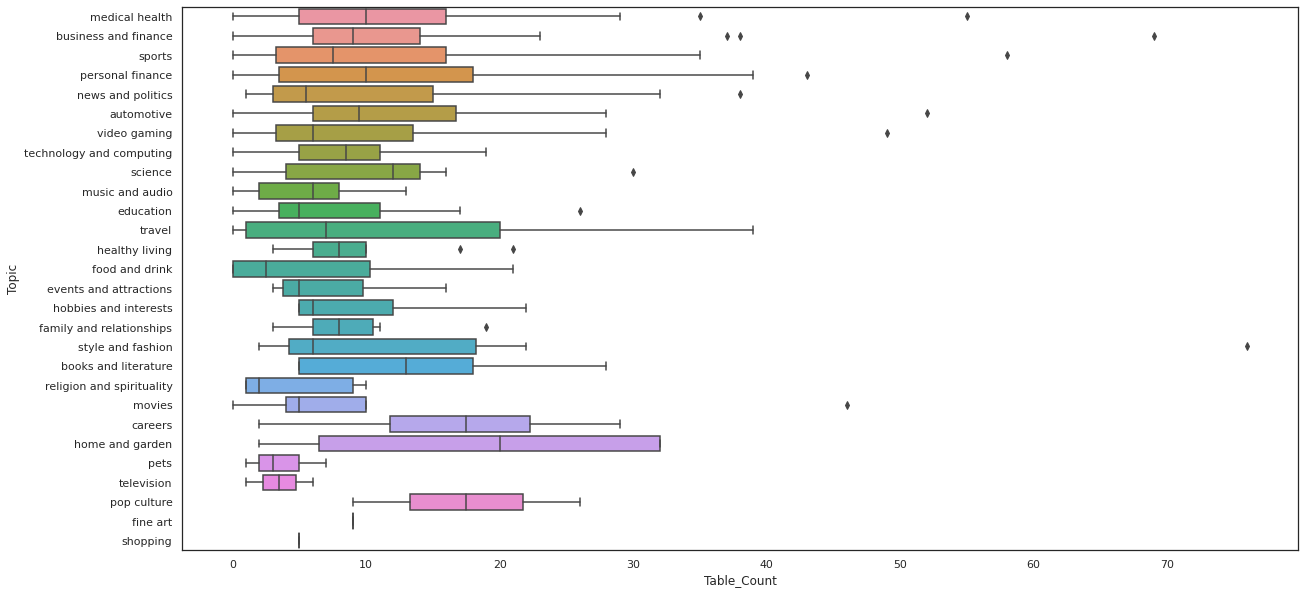

In [10]:
#tablecount boxplot per topic, ordered by topic popularity
sns.boxplot(y='Topic', x='Table_Count', data=df, order=df['Topic'].value_counts().index)

Next, we graphed the counts of the top 10 most popular topics throughout each quarter using our quarter index. Most topic distributions seem fairly uniform but one notable outlier is 'medical health' in Winter 2021 which had a significant in the number of papers on that topic.

<AxesSubplot:xlabel='Topic', ylabel='count'>

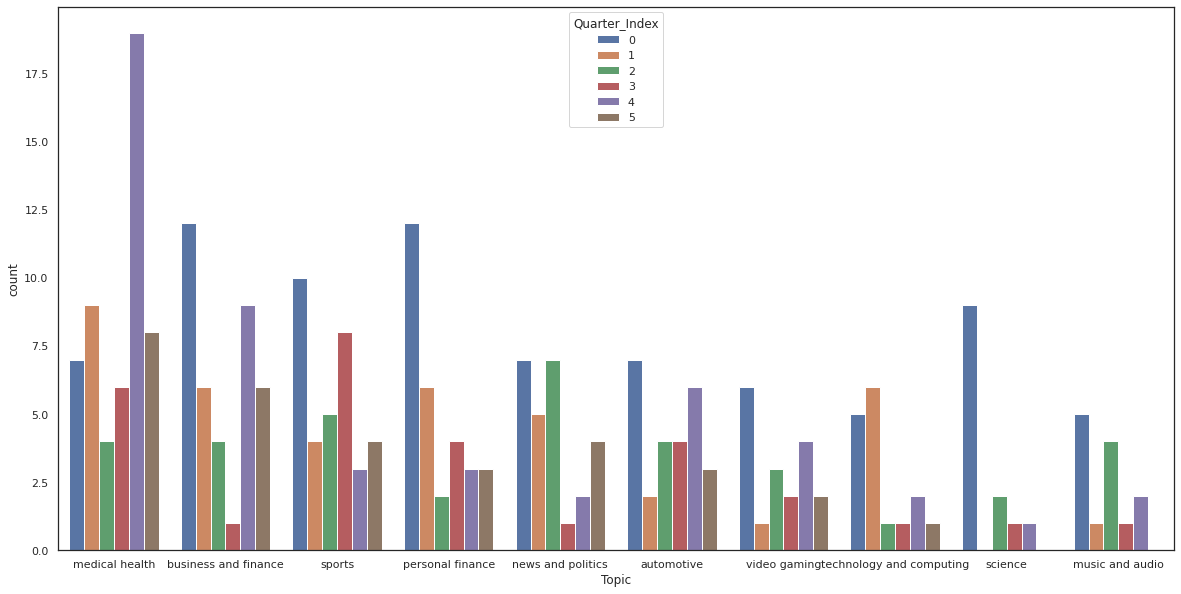

In [11]:
sns.countplot(x='Topic',data=df, hue='Quarter_Index', order=df['Topic'].value_counts().index[:10])

<AxesSubplot:xlabel='Quarter_Index', ylabel='Count'>

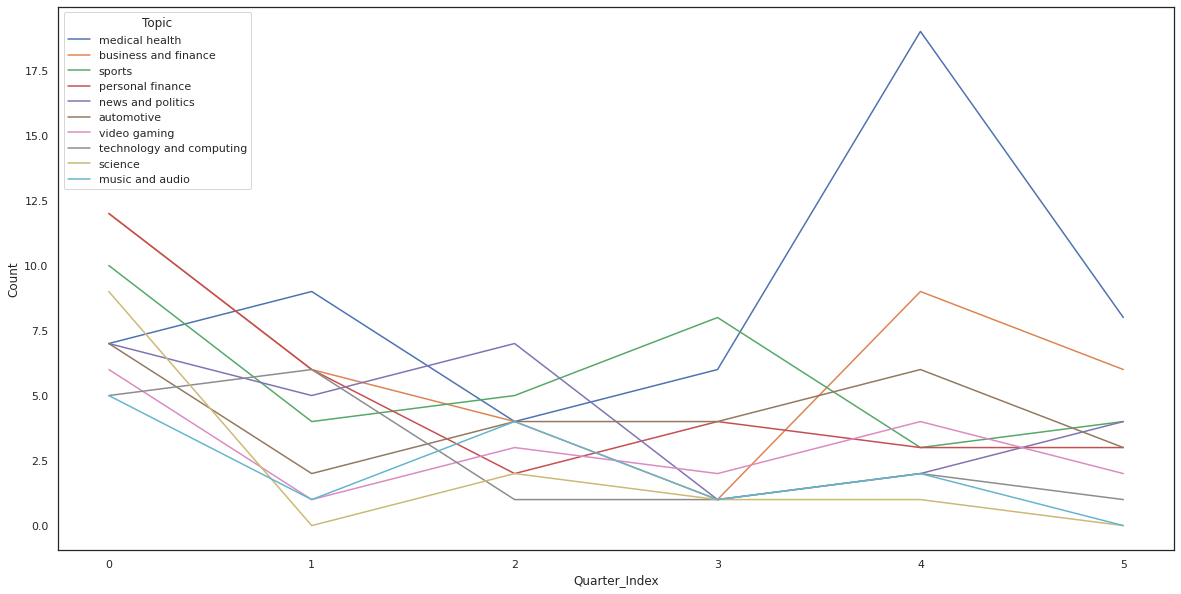

In [12]:
topics = []
indices = []
counts = []

for topic in df['Topic'].value_counts().index[:10]:
    for i in range(6):
        topics.append(topic)
        indices.append(i)
        counts.append(len(df[(df['Topic'] == topic) & (df['Quarter_Index'] == i)]))
        
tempDf = pd.DataFrame()
tempDf['Topic'] = topics
tempDf['Quarter_Index'] = indices
tempDf['Count'] = counts
sns.lineplot(x='Quarter_Index',data=tempDf, hue='Topic', y='Count')

Finally, we looked into which topics were most likely to be marked as strong by the instructors. It seems that the your topic does not have a large impact on whether your project is marked as strong (which makes sense) since 'food and drink' managed to have a strong showing, even higher than the most popular topic, 'medical health'.

Text(0.5, 1.0, 'The Five Most Popular Topics Among Projects Denoted as "Special"')

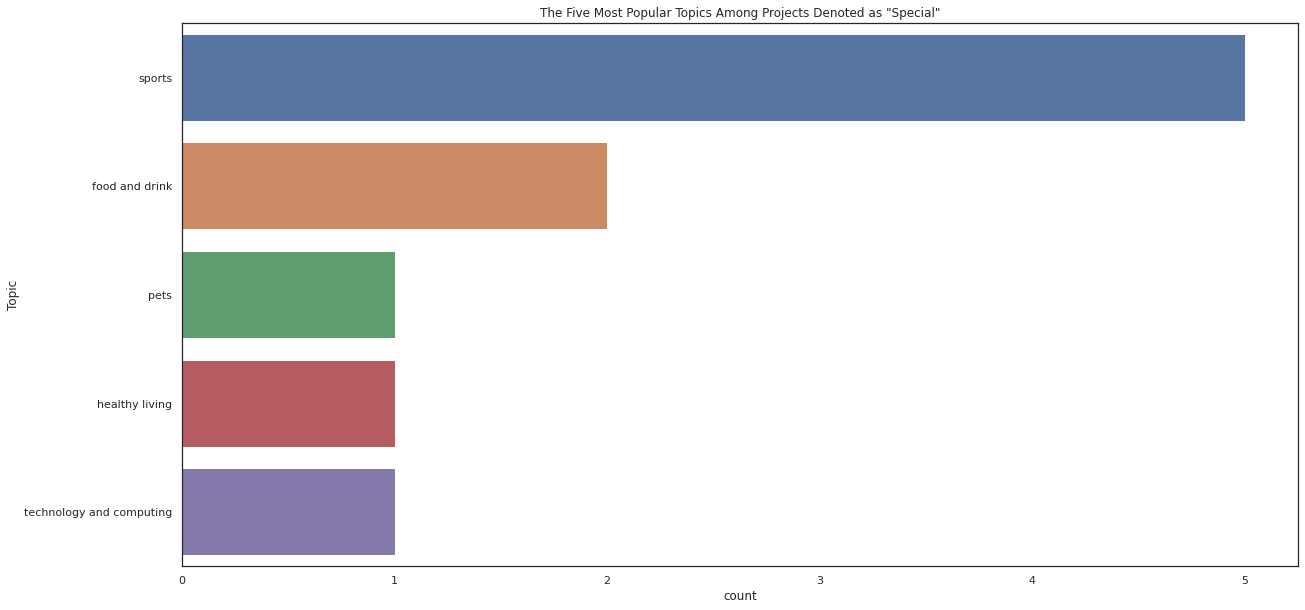

In [13]:
special_df = df.loc[df.Special == True]

special_df.head()

top_special = special_df['Topic'].value_counts()[:5].index.tolist()

top_special_df = special_df[special_df.Topic.isin(top_special)]

top_special_df = top_special_df.reset_index(drop = True)

sns.countplot(y=top_special_df['Topic'], order = top_special_df['Topic'].value_counts().index).set_title('The Five Most Popular Topics Among Projects Denoted as "Special"')
